# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

# For tasks (1) and (2), I will study the stock of Costco

In [35]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.optimize import minimize
from scipy.stats import norm
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

tickers = 'COST'

start_date = dt.datetime.today()-dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Logs of Daily Returns')

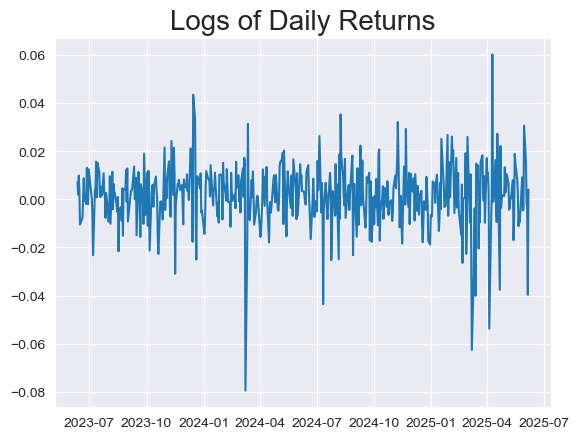

In [105]:
# calculate the log daily return
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

plt.plot(daily_returns)
plt.title(f'Logs of Daily Returns', size = 20)

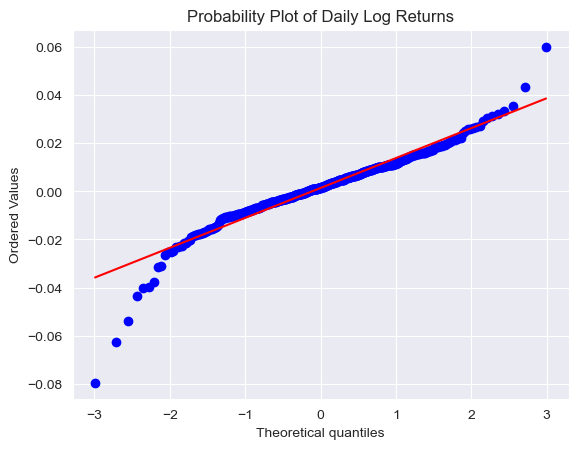

Costco log return distribution: p-value = 4.342413590487082e-26
→ Statistically significant evidence that the data is NOT normally distributed.


In [139]:
# probplot and p-value
_ = stats.probplot(daily_returns.iloc[:, 0], dist="norm", plot=plt)
plt.title("Probability Plot of Daily Log Returns")
plt.show()


p=stats.normaltest(daily_returns)[1][0]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

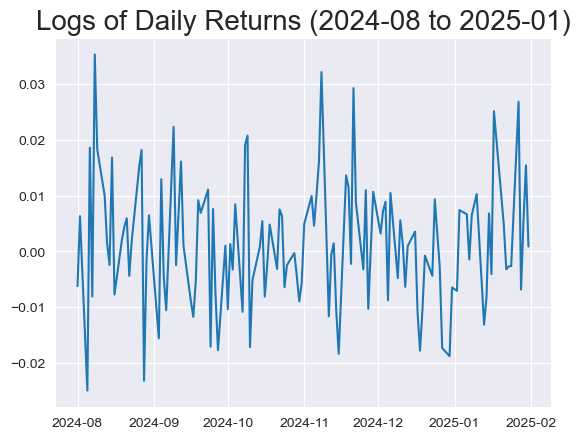

In [85]:
# the data deviates from the normal distribution due to heavy tails on both side
# Staring at the log return plot, seems to me the data from 2024-08 to 2025-01 do not have very large or small values, so I think this period should satisfy the normal distribution

focused_returns = daily_returns["2024-08":"2025-01"]

# Plot the focused data
plt.plot(focused_returns)
plt.title('Logs of Daily Returns (2024-08 to 2025-01)', size=20)
plt.show()


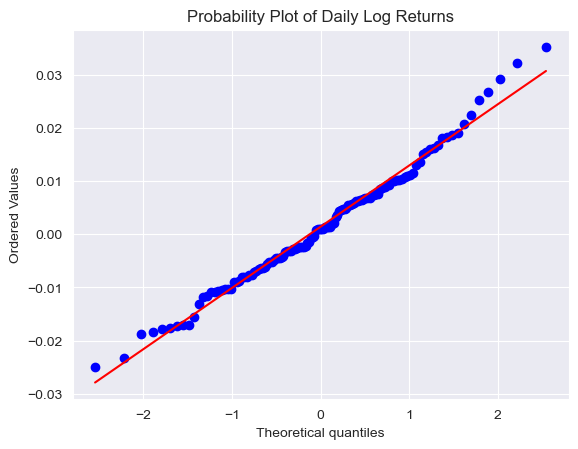

Costco log return distribution: p-value = 0.18777674305562958
→ No statistically significant evidence against normality.


In [87]:
_ = stats.probplot(focused_returns.iloc[:, 0], dist="norm", plot=plt)
plt.title("Probability Plot of Daily Log Returns")
plt.show()

p=stats.normaltest(focused_returns)[1][0]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

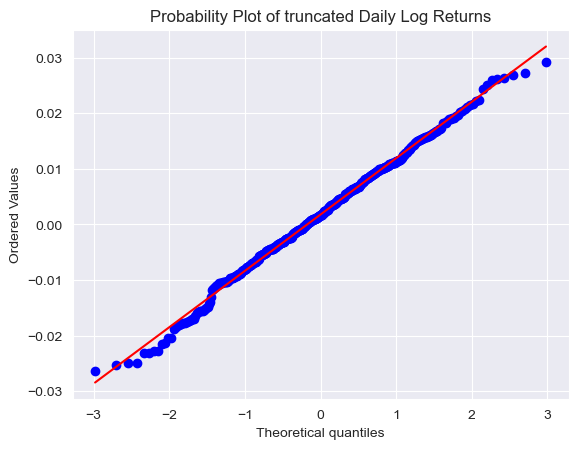

Costco log return distribution: p-value = 0.5656111859795995
→ No statistically significant evidence against normality.


In [162]:
# let me now remove the log return such that |log return|>0.03
truncated_daily_returns = daily_returns[abs(daily_returns) <= 0.03].dropna()

_ = stats.probplot(truncated_daily_returns.iloc[:, 0], dist="norm", plot=plt)
plt.title("Probability Plot of truncated Daily Log Returns")
plt.show()

p=stats.normaltest(truncated_daily_returns)[1][0]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

It is interesting to note that if I drop all data with absolute value greater than 0.02 or 0.01, the data set does not follow a normal distribution: In contrast to the full data set, these truncated data sets have flat tails.

Thus, I think there exists a regime — in time and magnitude — where log returns are approximately normal. Outside this regime, especially in the tails, they clearly are not. 

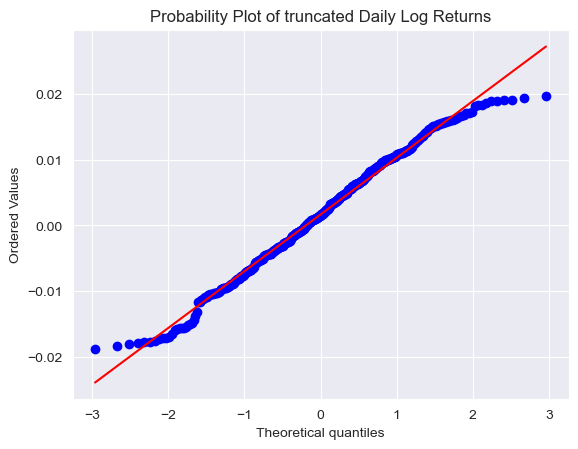

Costco log return distribution: p-value = 0.0032102559473608516
→ Statistically significant evidence that the data is NOT normally distributed.


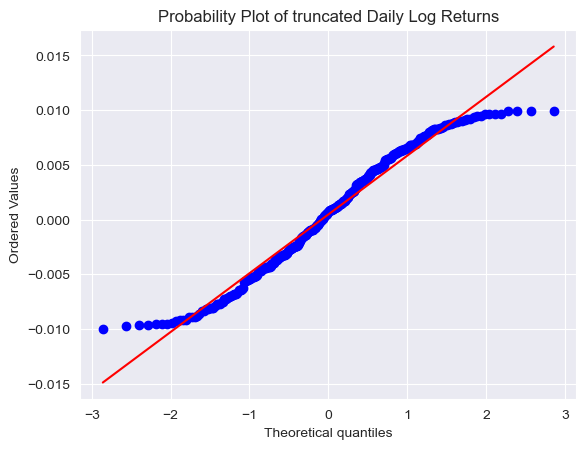

Costco log return distribution: p-value = 9.209811568268047e-16
→ Statistically significant evidence that the data is NOT normally distributed.


In [164]:
# let me now remove the log return such that |log return|>0.02 and 0.01
truncated_daily_returns = daily_returns[abs(daily_returns) <= 0.02].dropna()

_ = stats.probplot(truncated_daily_returns.iloc[:, 0], dist="norm", plot=plt)
plt.title("Probability Plot of truncated Daily Log Returns")
plt.show()

p=stats.normaltest(truncated_daily_returns)[1][0]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

truncated_daily_returns = daily_returns[abs(daily_returns) <= 0.01].dropna()

_ = stats.probplot(truncated_daily_returns.iloc[:, 0], dist="norm", plot=plt)
plt.title("Probability Plot of truncated Daily Log Returns")
plt.show()

p=stats.normaltest(truncated_daily_returns)[1][0]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

## Task (3), design a personal portfolio of which the log return approximately has normality

I choose a portfolio including tech (high profit)+ utility (stable)+ bond ETF (stable and profitable)+gold (stable). Since in the D'Agostino and Pearson’s test, one looks at the deviation of skewness and kurtosis to normal distribution. I minimize the skewness and excess kurtosis to find an investment portfolio.

[*********************100%***********************]  4 of 4 completed


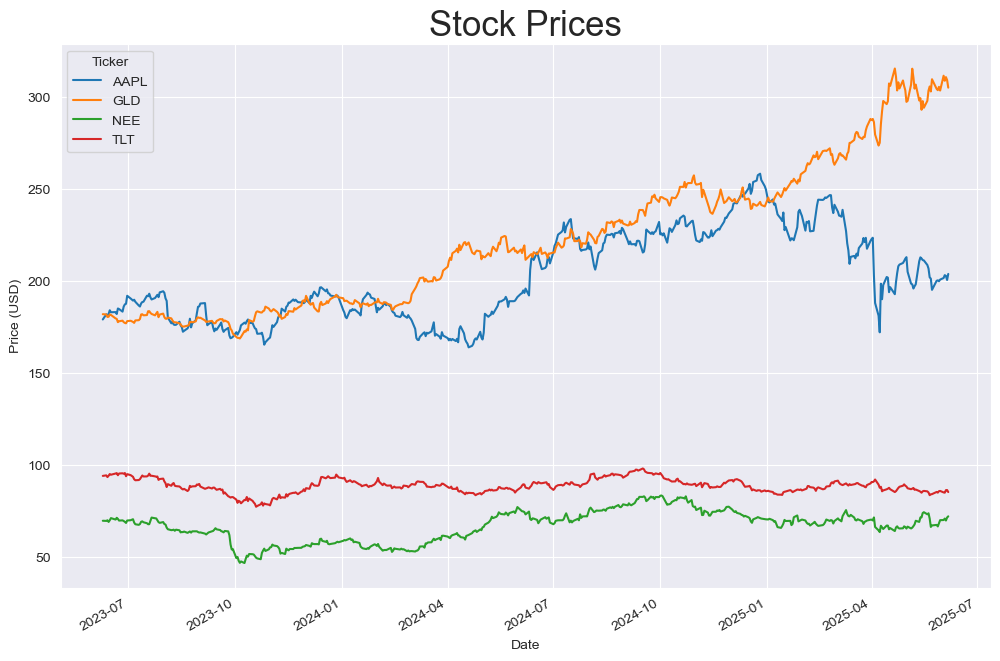

In [239]:
tickers = ['AAPL','NEE', 'TLT', 'GLD']

start_date = dt.datetime.today()-dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices', size = 25)
plt.ylabel('Price (USD)')
plt.show()



In [241]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

covariance_matrix = 252*((daily_returns).cov())
mean=daily_returns.mean()

In [245]:
covariance_matrix

Ticker,AAPL,GLD,NEE,TLT
Ticker,,,,
AAPL,0.074686,0.001991,0.009701,0.005627
GLD,0.001991,0.024310,0.007532,0.004510
NEE,0.009701,0.007532,0.085157,0.013986
TLT,0.005627,0.004510,0.013986,0.024530


In [243]:
mean

Ticker
AAPL    0.000259
GLD     0.001035
NEE     0.000068
TLT    -0.000197
dtype: float64

In [247]:
# minimize the Skewness and Kurtosis

from scipy.stats import kurtosis, skew



def sk(weights):
    portfolio_return = daily_returns @ weights
    return 0.7*abs(skew(portfolio_return)) + 0.3*abs(kurtosis(portfolio_return) - 3)

n_assets=len(tickers)

initial_weights = np.array([1/n_assets] * n_assets)

# Define weight constraints
#Weight is a number in [0,1]
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-0},
              {'type': 'ineq', 'fun': lambda weights: 1-max(weights)})

# Run the optimization to find the optimal weights
result = minimize(sk, initial_weights, constraints=constraints)

optimal_weights = result.x

print("Optimal Asset Weights to minimize skewness and kurtosis:")
for ticker, weight in zip(np.sort(tickers), optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")



Optimal Asset Weights to minimize skewness and kurtosis:
AAPL: Weight = 0.1596
GLD: Weight = 0.2967
NEE: Weight = 0.1603
TLT: Weight = 0.3834


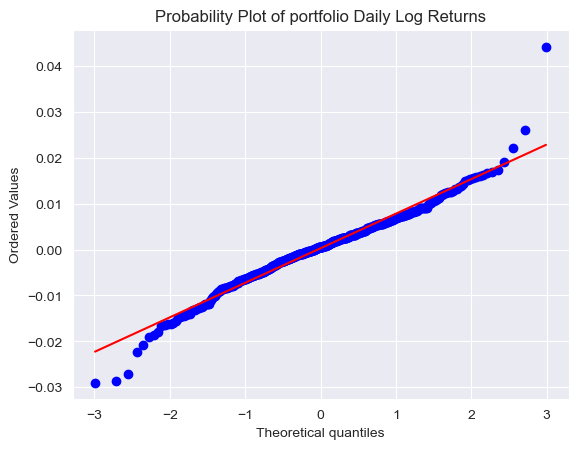

Costco log return distribution: p-value = 1.7604953861487637e-09
→ Statistically significant evidence that the data is NOT normally distributed.


In [253]:
# check the normality

portfolio_return = daily_returns @ optimal_weights

_ = stats.probplot(portfolio_return, dist="norm", plot=plt)
plt.title("Probability Plot of portfolio Daily Log Returns")
plt.show()

p=stats.normaltest(portfolio_return)[1]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

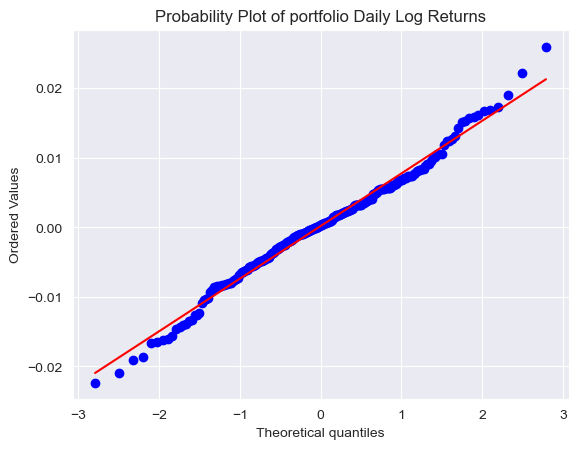

Costco log return distribution: p-value = 0.0954018902425833
→ No statistically significant evidence against normality.


In [251]:
# Although, recently the portfolio return does not follow a normal distribution, if we look at last year from 2023-06 to 2024-06, the return indeed approximately follow a normal distribution

portfolio_return = daily_returns @ optimal_weights

_ = stats.probplot(portfolio_return['2023-06':'2024-06'], dist="norm", plot=plt)
plt.title("Probability Plot of portfolio Daily Log Returns")
plt.show()

p=stats.normaltest(portfolio_return['2023-06':'2024-06'])[1]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

## Task (4), check the normality of the two portfolios considered in Mini Project 1

I found both of them does not have normality.

[*********************100%***********************]  5 of 5 completed


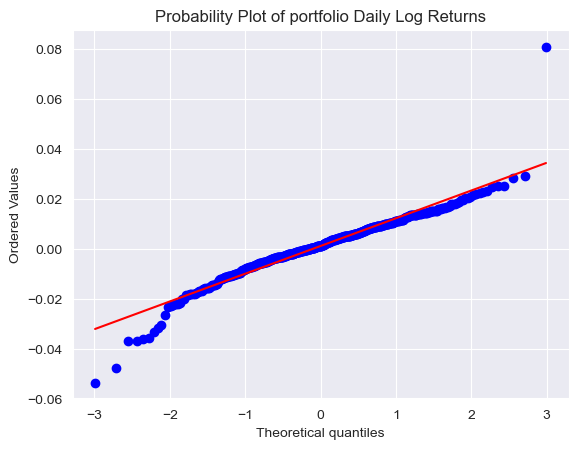

Costco log return distribution: p-value = 7.082099168466795e-17
→ Statistically significant evidence that the first portforlio is NOT normally distributed.


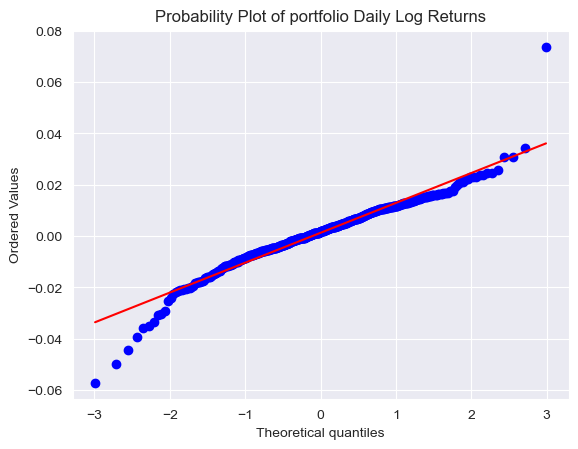

Costco log return distribution: p-value = 3.4172889196644026e-15
→ Statistically significant evidence that the second portforlio is NOT normally distributed.


In [262]:
tickers = ['AMZN', 'AAPL', 'GOOG', 'TSLA', 'COST']

start_date = dt.datetime.today()-dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

weights1=np.array([1.73011346e-01, 8.59865822e-03, 6.38691622e-01, 1.79698374e-01,
       1.99493200e-17])
weights2=np.array([2.34780373e-17,  1.43498766e-01,  7.13002468e-01,  1.33498766e-01,
        1.00000000e-02])

portfolio_return1 = daily_returns @ weights1
portfolio_return2 = daily_returns @ weights2

_ = stats.probplot(portfolio_return1, dist="norm", plot=plt)
plt.title("Probability Plot of portfolio Daily Log Returns")
plt.show()

p=stats.normaltest(portfolio_return1)[1]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the first portforlio is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality of the first portforlio.")

_ = stats.probplot(portfolio_return2, dist="norm", plot=plt)
plt.title("Probability Plot of portfolio Daily Log Returns")
plt.show()

p=stats.normaltest(portfolio_return2)[1]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the second portforlio is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality of the second portforlio.")

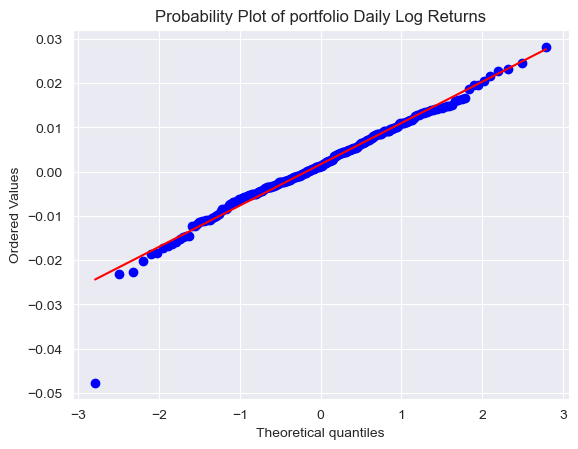

Costco log return distribution: p-value = 2.1859500371669897e-07
→ Statistically significant evidence that the first portforlio is NOT normally distributed.


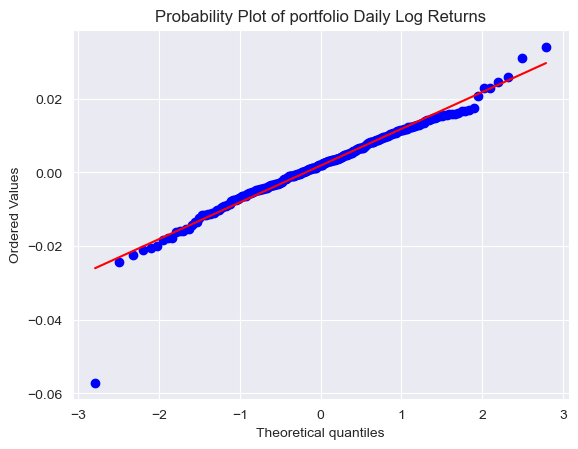

Costco log return distribution: p-value = 2.7280987125846644e-11
→ Statistically significant evidence that the second portforlio is NOT normally distributed.


In [273]:
_ = stats.probplot(portfolio_return1['2023-06':'2024-06'], dist="norm", plot=plt)
plt.title("Probability Plot of portfolio Daily Log Returns")
plt.show()

p=stats.normaltest(portfolio_return1['2023-06':'2024-06'])[1]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the first portforlio is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality of the first portforlio.")

_ = stats.probplot(portfolio_return2['2023-06':'2024-06'], dist="norm", plot=plt)
plt.title("Probability Plot of portfolio Daily Log Returns")
plt.show()

p=stats.normaltest(portfolio_return2['2023-06':'2024-06'])[1]
print(f'Costco log return distribution: p-value = {p}')
if p < 0.05:
    print("→ Statistically significant evidence that the second portforlio is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality of the second portforlio.")

# I look at the 503 stocks in S&P400 here

In [282]:
# Step 1: Load S&P 500 tickers from Wikipedia
sp500_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(sp500_url)
tickers = tables[0]['Symbol'].tolist()

# Step 2: Clean tickers (some have "." instead of "-")
tickers = [ticker.replace(".", "-") for ticker in tickers]

start_date = dt.datetime.today()-dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

[*********************100%***********************]  503 of 503 completed


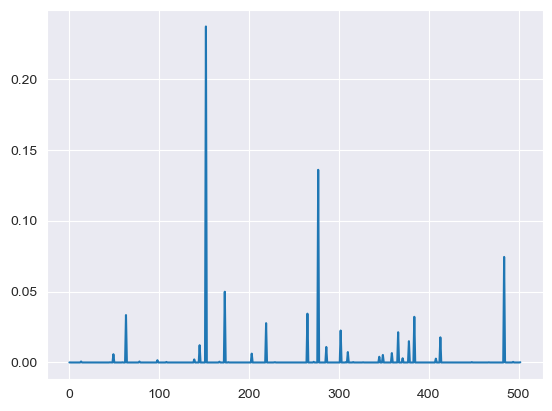

In [291]:
p_values = daily_returns.apply(lambda x: stats.normaltest(x)[1], axis=0)
plt.plot(p_values.values)

In [293]:
# As we can see, there are indeed stocks in the 503 stocks passing the noramlity test, I will now print out which stocks passed the normality check

normal_stocks = p_values[p_values > 0.05].index.tolist()

print("Tickers with p > 0.05 (no strong evidence against normality):")
print(normal_stocks)

Tickers with p > 0.05 (no strong evidence against normality):
['ED', 'LEN', 'WEC']


In [301]:
mean=daily_returns.mean()

In [303]:
print(mean['ED'])
print(mean['LEN'])
print(mean['WEC'])

0.0007532152886233163
-0.0009985688782415503
0.0014677402976248665
